In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 2px solid black;
    }
</style>

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import pandas as pd 
df=pd.read_excel('df13.xlsx',index_col=[0],parse_dates=['Date'])
df.head(10)

,ShipDate,ProductID,KulfiName,Producttype,sales,quantity,profitpercent,shippingcost,Requirement
Date,,,,,,,,,
2022-05-04,2022-05-06,1001,Malai,Stick,708,354,35.41500,35.46,HIGH
2022-05-05,2022-05-07,1002,Mango,Stick,420,210,21.01830,9.72,MEDIUM
2022-05-06,2022-05-08,1003,Pista,Stick,266,133,13.30600,8.17,MEDIUM
2022-05-07,2022-05-09,1004,Strawberry,Stick,45,22,2.24325,4.82,MEDIUM
2022-05-08,2022-05-10,1005,Raspberry,Stick,114,57,5.68350,4.70,MEDIUM
2022-05-09,2022-05-11,1006,Kesar Pista,Stick,255,128,12.76210,1.80,MEDIUM
2022-05-10,2022-05-12,1007,Choco + Malai,Stick,314,157,15.71100,24.10,MEDIUM
2022-05-11,2022-05-13,1008,Choco + Raspberry,Stick,276,138,13.80510,125.32,MEDIUM
2022-05-12,2022-05-14,1009,Black Currant,Stick,712,356,35.62280,107.10,HIGH


Read the excel sheet using Read excel methond 

In [3]:
print(df.columns.tolist())


['ShipDate', 'ProductID', 'KulfiName', 'Producttype', 'sales', 'quantity', 'profitpercent', 'shippingcost', 'Requirement']


In [47]:
d=pd.DataFrame(df.groupby(['Producttype'],as_index=True)['ProductID'].size())
d.sort_values(by=['ProductID'],inplace=True,ascending=False)

d


,ProductID
Producttype,
Seasonal,16
Natural Ice-cream,15
Slice,15
Stick,15
Spl Ice-Cream,7


# Get the total stock available at the factory 

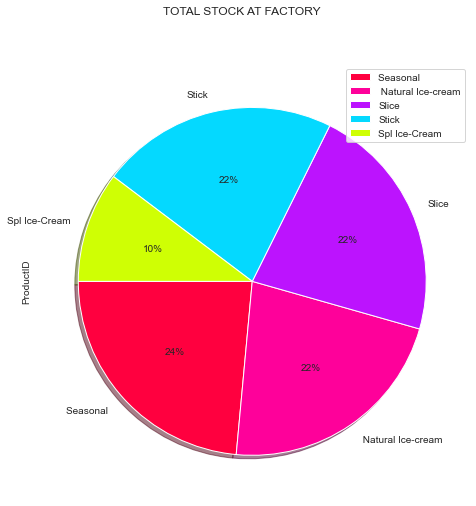

In [48]:
piee=d.plot.pie(rot=0,subplots=True,autopct='%0.0f%%',shadow=True,startangle=180,figsize=(12,8),
                colors=['#ff003f','#fe019a','#bc13fe','#04d9ff','#cfff04'],title='TOTAL STOCK AT FACTORY' )   
plt.show()

# After plotting the PIE chart , can visualize that there are equal amounts of Sticks , Slice and Natural Ice-cream and 24% of Seasonal and 10% SPL 

In [49]:
t=pd.DataFrame(df.groupby(['Producttype'],as_index=True)['quantity'].sum())
t

,quantity
Producttype,
Natural Ice-cream,2125
Seasonal,1196
Slice,1549
Spl Ice-Cream,1505
Stick,2431


# Current Quantity available at the bwarehouse

Text(0, 0.5, 'quantity')

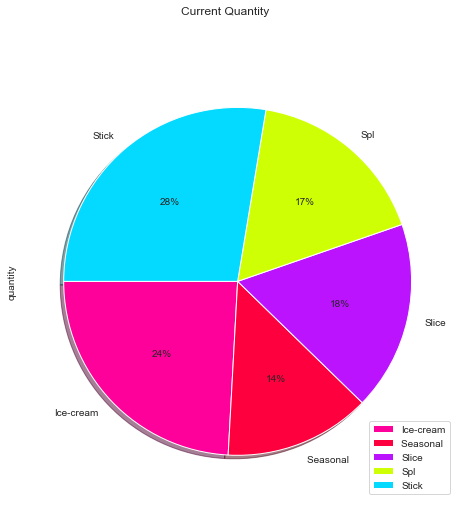

In [45]:
t.head(10).plot.pie(rot=0,figsize=(12,8),title='Current Quantity ',subplots=True,autopct='%0.0f%%',shadow=True,startangle=180,
                colors=['#fe019a','#ff003f','#bc13fe','#cfff04','#04d9ff'])

plt.ylabel('quantity')

# After plotting the PIE chart , can visualize that these are the total percentages of Items present at warehouse

In [99]:
pr = pd.DataFrame(df.groupby(['ProductID','Producttype','KulfiName']).sum()['profitpercent'])
pr.sort_values(by=['profitpercent'], inplace = True, ascending = False)
pr.head(10)

,,,profitpercent
ProductID,Producttype,KulfiName,
3008,Slice,Guava Peru with Chilli Slice,46.3320
2001,Natural Ice-cream,Tender Coconut,44.7600
5007,Spl Ice-Cream,Chocolate / Nuts Shrikhand Ice Cream,37.7980
3005,Slice,Choco Almond Slice,36.9130
5004,Spl Ice-Cream,Malai Pot,35.8020
1009,Stick,Black Currant,35.6228
1001,Stick,Malai,35.4150
1010,Stick,Butter Scotch,33.3420
2013,Natural Ice-cream,Oreo,32.4220


# Top 10 Most Profitable Kulfis using group  by function are 

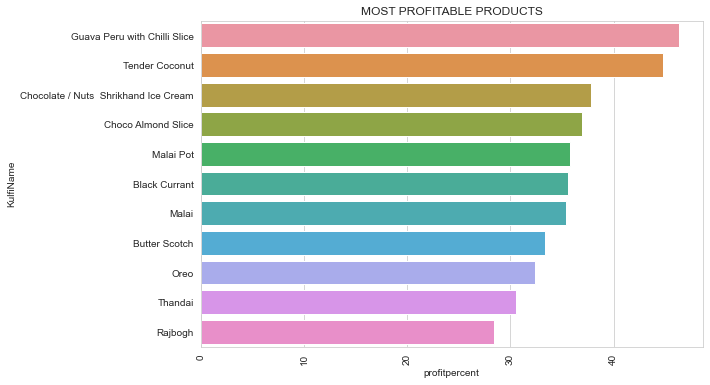

In [65]:
f, ax = plt.subplots(figsize=(9,6))

sns.barplot(
    x='profitpercent',
    y='KulfiName',
    data=df.nlargest(11, 'profitpercent')
).set(title='MOST PROFITABLE PRODUCTS')
sns.set_style("whitegrid")
plt.xticks(rotation = 'vertical')

plt.show()

### After plotting the Bar chart , can visualize the most profitable products are Guava Peru with Chilli Slice	with profit percent of 46%

As we can see that the two SPL Ice-cream are with a 35% and 37% of profit thus this proves that why there is more stock of SPL Ice-cream at warehouse

In [97]:
pr = pd.DataFrame(df.groupby(['ProductID','Producttype','KulfiName']).sum()['profitpercent'])
pr.sort_values(by=['profitpercent'], inplace = True, ascending = True)
pr.head(10)

,,,profitpercent
ProductID,Producttype,KulfiName,
3013,Slice,Casatta Slice,0.2955
2011,Natural Ice-cream,Jelly Belly,0.3003
4004,Seasonal,Black Grapes,0.5892
3012,Slice,Badam Pista Slice,0.7740
3009,Slice,Gulkand Slice,0.8224
2012,Natural Ice-cream,French Vanilla,0.8355
3011,Slice,Malai Badam Slice,0.8505
4013,Seasonal,Motichur,0.9768
3010,Slice,Sugar Free Malai Slice,1.3680


## Top 10 Least Profitable Product using group  by function are Casatta Slice	

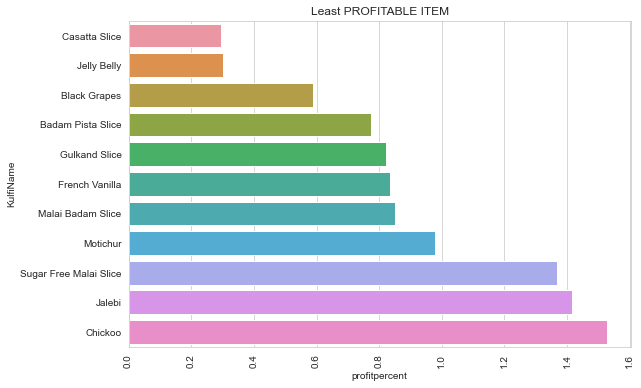

In [53]:
f, ax = plt.subplots(figsize=(9,6))

sns.barplot(
    x='profitpercent',
    y='KulfiName',
    data=df.nsmallest(11, 'profitpercent')
).set(title='Least PROFITABLE ITEM')
sns.set_style("whitegrid")
plt.xticks(rotation = 'vertical')

plt.show()

### After plotting the Bar chart , can visualize the least profitable products are Casatta Slice	

In [68]:
r = pd.DataFrame(df.groupby(['KulfiName']).sum()['sales'])
r.sort_values(by=['sales'], inplace = True, ascending = False)
r.head(10)

,sales
KulfiName,
Guava Peru with Chilli Slice,927
Tender Coconut,895
Chocolate / Nuts Shrikhand Ice Cream,756
Choco Almond Slice,738
Malai Pot,716
Black Currant,712
Malai,708
Butter Scotch,667
Oreo,648


## Top 10 Highest Selling Product are

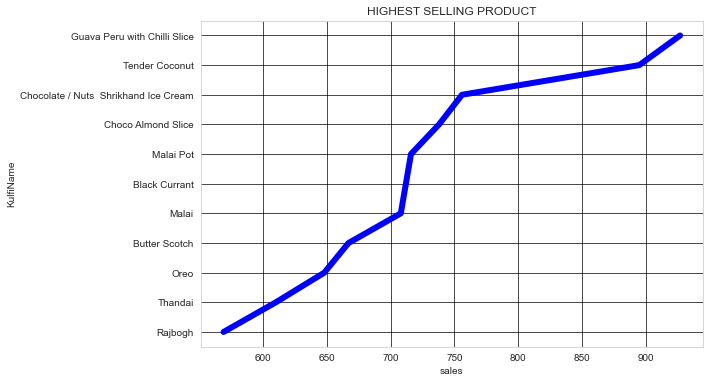

In [88]:
f, ax = plt.subplots(figsize=(9,6))

sns.lineplot(
    x='sales',
    y='KulfiName',
    data=df.nlargest(11, 'sales'),
    color='blue',
    lw=6
).set(title='HIGHEST SELLING PRODUCT')
plt.grid(color='Black', linestyle='solid', linewidth=0.7)#plt.xticks(rotation = 'vertical')

plt.show()

### After plotting the Line chart , can visualize the most profitable products are Guava Peru with Chilli Slice	 with and sale of 927 

In [56]:
bc = pd.DataFrame(df.groupby(['KulfiName']).sum()['sales'])
bc.sort_values(by=['sales'], inplace = True, ascending = True)
bc.head(10)

,sales
KulfiName,
Jelly Belly,6
Casatta Slice,6
Black Grapes,12
Badam Pista Slice,15
Gulkand Slice,16
Malai Badam Slice,17
French Vanilla,17
Motichur,20
Sugar Free Malai Slice,27


## The Least Selling Products are


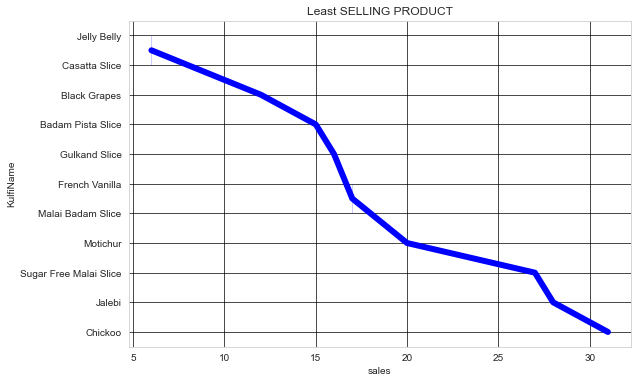

In [118]:
f, ax = plt.subplots(figsize=(9,6))

sns.lineplot(
    x='sales',
    y='KulfiName',
    data=df.nsmallest(11, 'sales'),
    color='blue',
    lw=6
).set(title='Least SELLING PRODUCT')
plt.grid(color='Black', linestyle='solid', linewidth=0.7)
plt.xticks(rotation = 'horizontal')

plt.show()

## After plotting the Line chart , can visualize  the least selling items 

In [58]:
crosstb=pd.crosstab(df.Producttype,df.Requirement)
crosstb

Requirement,HIGH,MEDIUM
Producttype,,
Natural Ice-cream,3,12
Seasonal,1,15
Slice,2,13
Spl Ice-Cream,2,5
Stick,3,12


##  The Requirement of Products based on their Product Type are

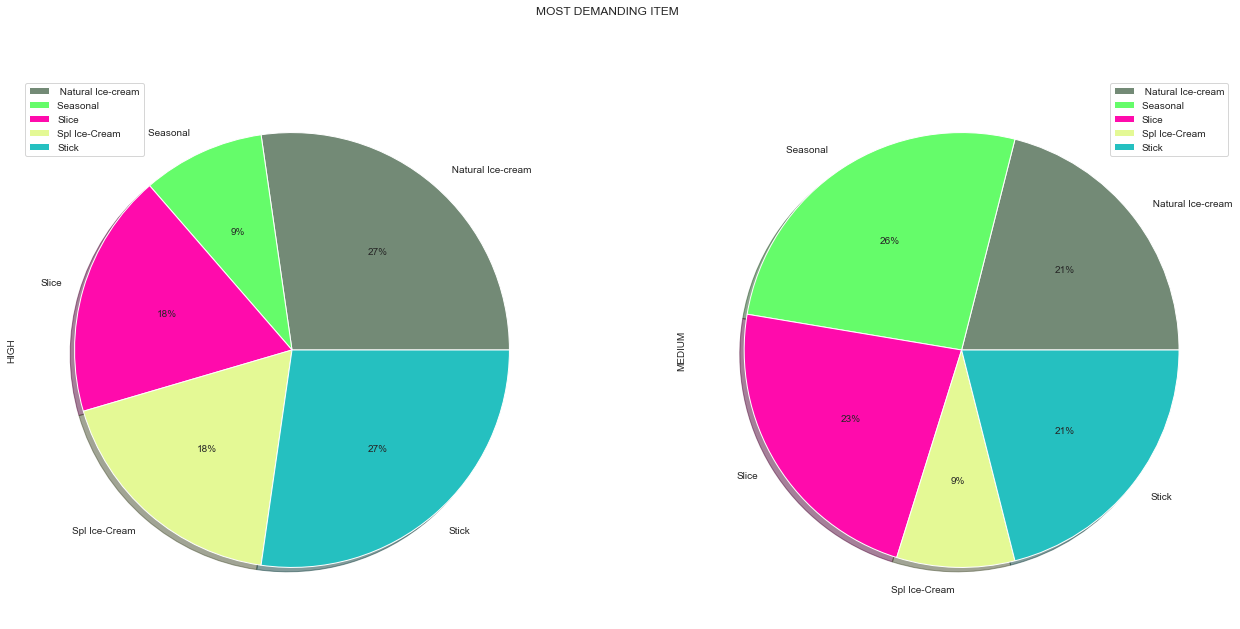

In [101]:
pie=crosstb.plot.pie(rot=0,subplots=True,figsize=(22,10),autopct='%0.0f%%',shadow=True,title='MOST DEMANDING ITEM'
                         ,colors=['#738A76','#65FC6A','#FF0BAC','#E4F995','#25C0C0'])

#  After plotting the Bar chart , can visualize the products with High 

# requirement  and products with Medium requirement  
# Similarly a Line chart is plotted for the same 

Text(0, 0.5, 'Requirement')

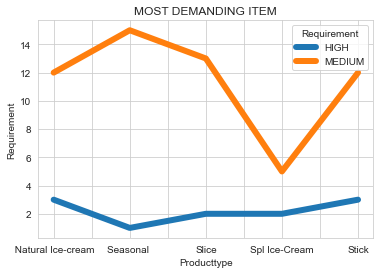

In [60]:
barplot=crosstb.plot.line(rot=0,lw=6,fontsize=10,title='MOST DEMANDING ITEM')
plt.ylabel('Requirement')

One can Visualize that there is a constant requirement of 3 products but for the other two it varies according to season 

In [103]:
d=pd.DataFrame(df.groupby(['ShipDate'],as_index=True)['shippingcost'].sum())
d.shippingcost.resample('M').mean()

ShipDate
2022-05-31    21.525000
2022-06-30    17.680667
2022-07-31    54.265000
Freq: M, Name: shippingcost, dtype: float64

# Montly mean of the shipping cost W.R.T Shipping date using Time series analysis 

#  After plotting the Bar chart using Time series analysis method on montly basis, can visualize  that the shipping cost is highest during July and least during June 


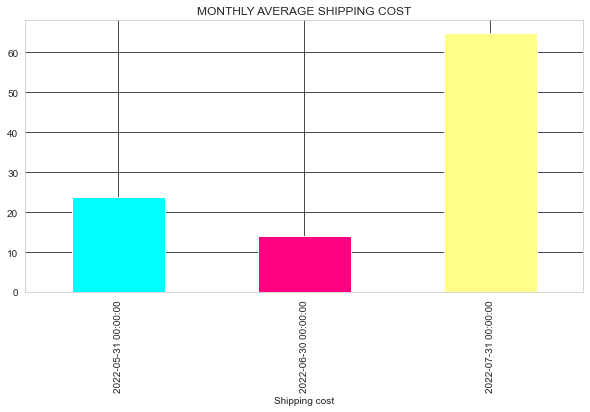

In [117]:
df.shippingcost.resample('M').mean().plot.bar(color=['cyan','#FF0080','#FFFF8A'],figsize=(10,5),title='MONTHLY AVERAGE SHIPPING COST')
plt.xlabel('Shipping cost')

plt.grid(color='Black', linestyle='solid', lw=0.7)

# From the above observations .It can be visulaized that the most profitable and Highest selling (top 3) Products are 
 
    | 3008  Slice              Guava Peru with Chilli Slice         |
    | 2001  Natural Ice-cream  Tender Coconut                       |
    | 5007  Spl Ice-Cream      Chocolate / Nuts Shrikhand Ice Cream |

# From the above observations .It can also be visulaized that the Least profitable and Least selling (top 3) Products are
    | 3013   Slice             Casatta Slice         |
    | 2011   Natural Ice-cream Jelly Belly           |
    | 4004   Seasonal          Black Grapes          |
 
 


